# Setup

In [ ]:
!git clone https://github.com/neuspell/neuspell
%cd neuspell

Cloning into 'neuspell'...
remote: Enumerating objects: 638, done.
remote: Counting objects: 100% (441/441), done.
remote: Compressing objects: 100% (280/280), done.
remote: Total 638 (delta 269), reused 292 (delta 143), pack-reused 197
Receiving objects: 100% (638/638), 74.43 MiB | 24.26 MiB/s, done.
Resolving deltas: 100% (295/295), done.
/content/neuspell


In [ ]:
!pip install -e .

Obtaining file:///content/neuspell
     |████████████████████████████████| 2.1MB 13.4MB/s 
     |████████████████████████████████| 1.2MB 50.6MB/s 
     |████████████████████████████████| 133kB 56.5MB/s 
     |████████████████████████████████| 901kB 53.1MB/s 
     |████████████████████████████████| 3.3MB 56.0MB/s 
     |████████████████████████████████| 133kB 58.4MB/s 
     |████████████████████████████████| 7.4MB 27.8MB/s 
     |████████████████████████████████| 81kB 12.7MB/s 
ERROR: botocore 1.20.57 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.
  Running setup.py develop for neuspell


In [ ]:
!pip install urllib3==1.25.4

     |████████████████████████████████| 133kB 16.1MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
!pip install folium==0.2.1

     |████████████████████████████████| 71kB 7.5MB/s 
  Created wheel for folium: filename=folium-0.2.1-cp37-none-any.whl size=79979 sha256=c9509283a6cce53654de1218ef551a39602ba7ad114e39495147bdec02c1770b
  Stored in directory: /root/.cache/pip/wheels/b8/09/f0/52d2ef419c2aaf4fb149f92a33e0008bdce7ae816f0dd8f0c5
Successfully built folium
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [ ]:
!pip install -r extras-requirements.txt

Obtaining file:///content/neuspell (from -r extras-requirements.txt (line 1))
Obtaining file:///content/neuspell (from -r extras-requirements.txt (line 2))
     |████████████████████████████████| 522kB 14.3MB/s 
     |████████████████████████████████| 122kB 30.8MB/s 
     |████████████████████████████████| 266kB 32.5MB/s 
  Created wheel for overrides: filename=overrides-3.1.0-cp37-none-any.whl size=10174 sha256=0b0859d99e8462ef2e4ec0156e5375f90f77b416c800d3a6eac1f75c6ea80ac7
  Stored in directory: /root/.cache/pip/wheels/5c/24/13/6ef8600e6f147c95e595f1289a86a3cc82ed65df57582c65a9
  Created wheel for jsonnet: filename=jsonnet-0.17.0-cp37-cp37m-linux_x86_64.whl size=3388783 sha256=48b18a6d77bfa428fa098ccd26685cbffef6980136ee88a494dfb64a785208d4
  Stored in directory: /root/.cache/pip/wheels/26/7a/37/7dbcc30a6b4efd17b91ad1f0128b7bbf84813bd4e1cfb8c1e3
Successfully built overrides jsonnet
ERROR: allennlp 1.5.0 has requirement torch<1.8.0,>=1.6.0, but you'll have torch 1.8.1+cu101 which is 

In [ ]:
!pip install torch==1.6.0

     |████████████████████████████████| 748.8MB 19kB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: allennlp 1.5.0 has requirement transformers<4.3,>=4.1, but you'll have transformers 4.5.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101


In [ ]:
!pip install transformers==4.1

     |████████████████████████████████| 1.5MB 9.8MB/s 
     |████████████████████████████████| 2.9MB 53.6MB/s 
  Found existing installation: tokenizers 0.10.2
    Uninstalling tokenizers-0.10.2:
      Successfully uninstalled tokenizers-0.10.2
  Found existing installation: transformers 4.5.1
    Uninstalling transformers-4.5.1:
      Successfully uninstalled transformers-4.5.1


In [ ]:
import neuspell

data folder is set to `/content/neuspell/neuspell/../data` script


In [ ]:
%cd data/traintest
!python download_datafiles.py 

/content/neuspell/data/traintest
./wo_context created


In [ ]:
%cd /content/neuspell

/content/neuspell


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Train

## Library

In [ ]:
import torch
from torch import nn
from torch.nn.utils.rnn import pad_sequence
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import torch.nn.functional as F
import numpy as np

import time

from neuspell.seq_modeling.sclstm import load_model
from neuspell.seq_modeling.helpers import load_data, train_validation_split, batch_accuracy_func
from neuspell.seq_modeling.helpers import get_tokens, progressBar
from neuspell.seq_modeling.helpers import batch_iter, labelize, tokenize, char_tokenize, sclstm_tokenize

from neuspell.seq_modeling.helpers import load_vocab_dict, save_vocab_dict

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Load pretrained model and optimizer

In [ ]:
# load pretrained

model_name = '.pt'

pretrained_vocab = load_vocab_dict('/content/drive/MyDrive/NLP/sclstm_vocab.pkl')

model = load_model(pretrained_vocab)

model.load_state_dict(torch.load('/content/drive/MyDrive/NLP/'+model_name))

# load pretrained optimizer

optimizer_name = '.pt'

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

optimizer.load_state_dict(torch.load('/content/drive/MyDrive/NLP/'+optimizer_name))

## Load data

In [ ]:
train_data = load_data('/content/neuspell/data/traintest/','test.1blm','test.1blm.noise.prob')

train_data, valid_data = train_validation_split(train_data, 0.90, seed=1)

vocab_ref = {}

vocab = get_tokens([i[0] for i in train_data],
                           keep_simple=True,
                           min_max_freq=(2,float("inf")),
                           topk=100000,
                           intersect=vocab_ref,
                           load_char_tokens=True)

save_vocab_dict('/content/drive/MyDrive/NLP/sclstm_vocab.pkl', vocab)

273134it [00:00, 350769.23it/s]
273134it [00:00, 1326274.84it/s]
  0%|          | 0/245821 [00:00<?, ?it/s]

loaded tuples of (corr,incorr) examples from /content/neuspell/data/traintest/


100%|██████████| 245821/245821 [00:01<00:00, 157533.34it/s]


Total tokens found: 155272


  0%|          | 0/245821 [00:00<?, ?it/s]

Total tokens retained: 139243
Total tokens retained: 67965
Total tokens retained: 67965
loading character tokens


100%|██████████| 245821/245821 [00:01<00:00, 197716.57it/s]


number of unique chars found: 98
{'<<CHAR_UNK>>': 0, '<<CHAR_PAD>>': 1, '<<CHAR_START>>': 2, '<<CHAR_END>>': 3, 'H': 4, 'e': 5, ' ': 6, 'w': 7, 'a': 8, 's': 9, 'b': 10, 'r': 11, 'i': 12, 'f': 13, 'l': 14, 'y': 15, 'h': 16, 'o': 17, 'p': 18, 't': 19, 'z': 20, 'd': 21, 'n': 22, 'c': 23, 'k': 24, 'j': 25, 'u': 26, '.': 27, 'A': 28, 'm': 29, 'B': 30, 'g': 31, 'G': 32, 'M': 33, '3': 34, 'v': 35, ',': 36, '7': 37, '6': 38, '2': 39, 'T': 40, 'D': 41, 'S': 42, 'E': 43, '1': 44, '-': 45, 'x': 46, '4': 47, '9': 48, '(': 49, 'U': 50, 'P': 51, 'I': 52, ')': 53, "'": 54, ';': 55, 'q': 56, '"': 57, '?': 58, 'Y': 59, 'C': 60, 'O': 61, 'K': 62, 'L': 63, 'N': 64, 'R': 65, 'W': 66, '0': 67, '8': 68, 'J': 69, ':': 70, 'F': 71, '5': 72, '%': 73, 'V': 74, '/': 75, '$': 76, 'Z': 77, 'Q': 78, '!': 79, '[': 80, ']': 81, 'X': 82, '&': 83, '@': 84, '+': 85, '_': 86, '#': 87, '*': 88, '|': 89, '>': 90, '^': 91, '\\': 92, '=': 93, '<': 94, '~': 95, '{': 96, '}': 97}


## Load model and optimizer

In [ ]:
model = load_model(vocab)
model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

VALID_BATCH_SIZE = 32

data_iter = batch_iter(train_data, batch_size=VALID_BATCH_SIZE, shuffle=False)

TRAIN_BATCH_SIZE = 32

DEVICE = 'cuda'

Number of parameters in the model: 79276416


## Set epoch

In [ ]:
START_EPOCH = 1
N_EPOCHS = 8

## Training

In epoch: 1
train_data size: 245821
Percent: [----------------------------->] 100% || batch_time: 0.0815 || batch_loss: 0.6771 || avg_batch_loss: 1.6888 || batch_acc: 0.0991 || avg_batch_acc: 0.0991 
Epoch 1 train_loss: 1.688840134539228
valid_data size: 27313
Percent: [----------------------------->] 100% || batch_time: 0.0300 || batch_loss: 0.4464 || avg_batch_loss: 0.5320 || batch_acc: 0.9343 || avg_batch_acc: 0.9132 
Epoch 1 valid_loss: 0.5320162534434566
In epoch: 2
train_data size: 245821
Percent: [----------------------------->] 100% || batch_time: 0.0788 || batch_loss: 0.4313 || avg_batch_loss: 0.5500 || batch_acc: 0.9290 || avg_batch_acc: 0.9290 
Epoch 2 train_loss: 0.549981766645873
valid_data size: 27313
Percent: [----------------------------->] 100% || batch_time: 0.0288 || batch_loss: 0.2557 || avg_batch_loss: 0.3119 || batch_acc: 0.9465 || avg_batch_acc: 0.9378 
Epoch 2 valid_loss: 0.31192910922494926


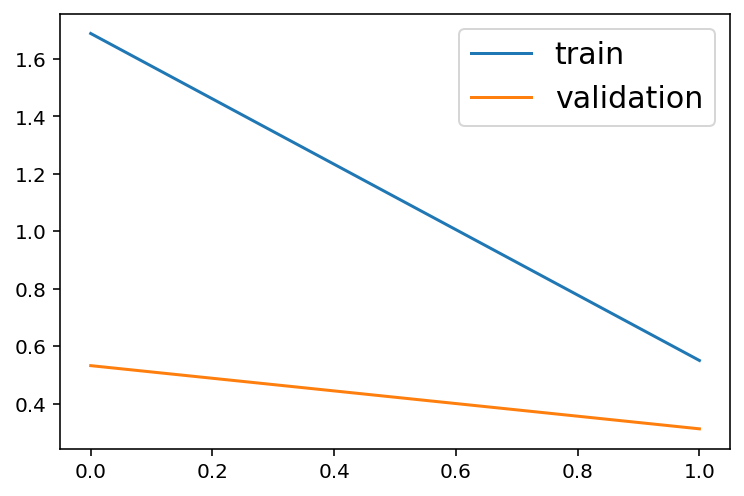

In epoch: 3
train_data size: 245821
Percent: [----------------------------->] 100% || batch_time: 0.0816 || batch_loss: 0.3652 || avg_batch_loss: 0.3493 || batch_acc: 0.9427 || avg_batch_acc: 0.9427 
Epoch 3 train_loss: 0.3493362153295706
valid_data size: 27313
Percent: [----------------------------->] 100% || batch_time: 0.0307 || batch_loss: 0.1797 || avg_batch_loss: 0.2427 || batch_acc: 0.9586 || avg_batch_acc: 0.9454 
Epoch 3 valid_loss: 0.24265301173478715


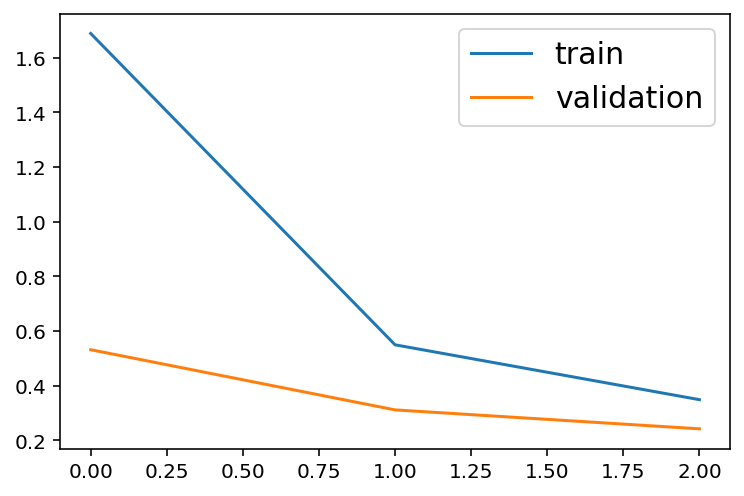

In epoch: 4
train_data size: 245821
Percent: [----------------------------->] 100% || batch_time: 0.0804 || batch_loss: 0.3805 || avg_batch_loss: 0.2608 || batch_acc: 0.9564 || avg_batch_acc: 0.9564 
Epoch 4 train_loss: 0.260778057977918
valid_data size: 27313
Percent: [----------------------------->] 100% || batch_time: 0.0304 || batch_loss: 0.1402 || avg_batch_loss: 0.2115 || batch_acc: 0.9611 || avg_batch_acc: 0.9503 
Epoch 4 valid_loss: 0.2114552937325884


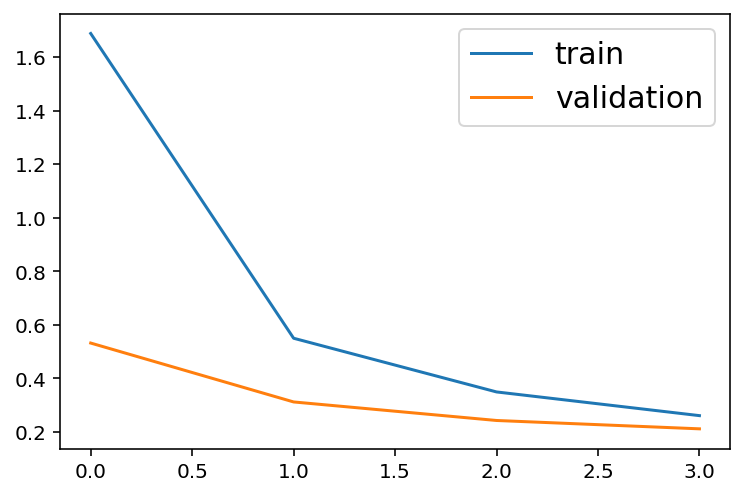

In epoch: 5
train_data size: 245821
Percent: [----------------------------->] 100% || batch_time: 0.0797 || batch_loss: 0.2233 || avg_batch_loss: 0.2087 || batch_acc: 0.9778 || avg_batch_acc: 0.9778 
Epoch 5 train_loss: 0.20870212383667214
valid_data size: 27313
Percent: [----------------------------->] 100% || batch_time: 0.0308 || batch_loss: 0.1387 || avg_batch_loss: 0.1958 || batch_acc: 0.9635 || avg_batch_acc: 0.9526 
Epoch 5 valid_loss: 0.19583367319031678


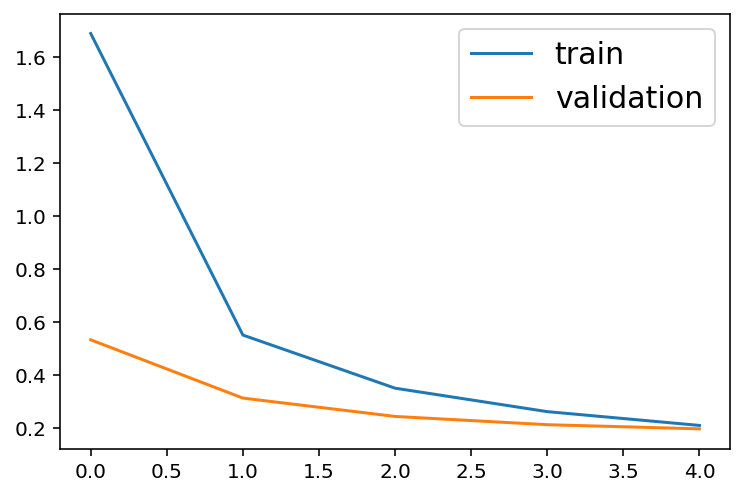

In epoch: 6
train_data size: 245821
Percent: [>                             ] 1% || batch_time: 0.0782 || batch_loss: 0.2112 || avg_batch_loss: 0.1599 || batch_acc: 0.9769 || avg_batch_acc: 0.9769 

KeyboardInterrupt: ignored

In [ ]:
# train and eval

MODEL_NAME = 'sclstm'

total_train_loss = []
total_val_loss = []

for epoch_id in range(START_EPOCH,N_EPOCHS+1):

    print(f"In epoch: {epoch_id}")
    # train loss and backprop
    train_loss = 0.
    train_acc = 0.
    train_acc_count = 0.
    print("train_data size: {}".format(len(train_data)))

    train_data_iter = batch_iter(train_data, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
    nbatches = int(np.ceil(len(train_data)/TRAIN_BATCH_SIZE))

    for batch_id, (batch_labels,batch_sentences) in enumerate(train_data_iter):
        optimizer.zero_grad()
        st_time = time.time()

        # set batch data
        batch_labels, batch_lengths = labelize(batch_labels, vocab)
        batch_idxs, batch_lengths_ = sclstm_tokenize(batch_sentences, vocab)
        assert (batch_lengths_==batch_lengths).all()==True
        batch_idxs = [batch_idxs_.to(DEVICE) for batch_idxs_ in batch_idxs]
        #batch_lengths = batch_lengths.to(DEVICE)
        batch_labels = batch_labels.to(DEVICE)


        # forward
        model.train()

        loss = model(batch_idxs, batch_lengths, targets=batch_labels)

        batch_loss = loss.cpu().detach().numpy()
        train_loss += batch_loss

        # backward
        loss.backward()
        optimizer.step()

        # compute accuracy in numpy
        if batch_id%10000==0:
            train_acc_count += 1
            model.eval()
            with torch.no_grad():
                _, batch_predictions = model(batch_idxs, batch_lengths, targets=batch_labels)
            model.train()

            batch_labels = batch_labels.cpu().detach().numpy()
            batch_lengths = batch_lengths.cpu().detach().numpy()
            ncorr,ntotal = batch_accuracy_func(batch_predictions,batch_labels,batch_lengths)
            batch_acc = ncorr/ntotal
            train_acc += batch_acc     

        # update progress
        progressBar(batch_id+1,
                    int(np.ceil(len(train_data) / TRAIN_BATCH_SIZE)), 
                    ["batch_time","batch_loss","avg_batch_loss","batch_acc","avg_batch_acc"],
                    [time.time()-st_time,batch_loss,train_loss/(batch_id+1),batch_acc,train_acc/train_acc_count]) 
    print(f"\nEpoch {epoch_id} train_loss: {train_loss/(batch_id+1)}")

    mean_batch_loss = train_loss / nbatches
    total_train_loss.append(mean_batch_loss)

    # save model and optimizer every epoch
    model_name = MODEL_NAME + "_epoch_" + str(epoch_id) + '.pt'
    torch.save(model.state_dict(), 
            '/content/drive/MyDrive/NLP/'+model_name)
    
    # save optimizer
    optimizer_name = MODEL_NAME + "_optimizer_epoch_" + str(epoch_id) + '.pt'
    torch.save(optimizer.state_dict(), 
        '/content/drive/MyDrive/NLP/'+optimizer_name)
    
    # valid loss
    valid_loss = 0.
    valid_acc = 0.
    print("valid_data size: {}".format(len(valid_data)))

    valid_data_iter = batch_iter(valid_data, batch_size=VALID_BATCH_SIZE, shuffle=False)
    val_nbatches = int(np.ceil(len(valid_data)/VALID_BATCH_SIZE))

    for batch_id, (batch_labels,batch_sentences) in enumerate(valid_data_iter):
        st_time = time.time()
        # set batch data
        batch_labels, batch_lengths = labelize(batch_labels, vocab)
        batch_idxs, batch_lengths_ = sclstm_tokenize(batch_sentences, vocab)
        assert (batch_lengths_==batch_lengths).all()==True
        batch_idxs = [batch_idxs_.to(DEVICE) for batch_idxs_ in batch_idxs]
        #batch_lengths = batch_lengths.to(DEVICE)
        batch_labels = batch_labels.to(DEVICE)
        # forward
        model.eval()
        with torch.no_grad():
            batch_loss, batch_predictions = model(batch_idxs, batch_lengths, targets=batch_labels)
        model.train()        
        valid_loss += batch_loss
        # compute accuracy in numpy
        batch_labels = batch_labels.cpu().detach().numpy()
        batch_lengths = batch_lengths.cpu().detach().numpy()
        ncorr,ntotal = batch_accuracy_func(batch_predictions,batch_labels,batch_lengths)
        batch_acc = ncorr/ntotal
        valid_acc += batch_acc
        # update progress
        progressBar(batch_id+1,
                    int(np.ceil(len(valid_data) / VALID_BATCH_SIZE)), 
                    ["batch_time","batch_loss","avg_batch_loss","batch_acc","avg_batch_acc"], 
                    [time.time()-st_time,batch_loss,valid_loss/(batch_id+1),batch_acc,valid_acc/(batch_id+1)]) 
    print(f"\nEpoch {epoch_id} valid_loss: {valid_loss/(batch_id+1)}")

    mean_val_loss = valid_loss / val_nbatches
    total_val_loss.append(mean_val_loss)
    
    if epoch_id >= 2:
        plt.figure(epoch_id)
        plt.plot(total_train_loss, label='train')
        plt.plot(total_val_loss, label='validation')
        plt.legend(fontsize=15)
        plt.show()



    

converge at epoch 5

### Evaluation

### load earlier model in case of overfitting

In [ ]:
# load pretrained

model_name = 'sclstm_epoch_5.pt'

pretrained_vocab = load_vocab_dict('/content/drive/MyDrive/NLP/sclstm_vocab.pkl')

pretrained_model = load_model(pretrained_vocab)

pretrained_model.load_state_dict(torch.load('/content/drive/MyDrive/NLP/'+model_name))


Number of parameters in the model: 79276416


<All keys matched successfully>

In [ ]:
from neuspell.seq_modeling.sclstm import model_inference

test_data = load_data('/content/neuspell/data/traintest/','test.bea60k','test.bea60k.noise')

predicted_result = model_inference(pretrained_model, test_data, 1, DEVICE, 16, vocab)

63044it [00:00, 362065.30it/s]
63044it [00:00, 1195452.39it/s]
0it [00:00, ?it/s]

loaded tuples of (corr,incorr) examples from /content/neuspell/data/traintest/
###############################################
data size: 63044


3941it [01:56, 33.89it/s]


Epoch None valid_loss: 0.3022065202652864
total inference time for this data is: 116.393653 secs
###############################################
total token count: 1032061
_corr2corr:935480, _corr2incorr:26518, _incorr2corr:48820, _incorr2incorr:21243
accuracy is 0.9537226966235522
word correction rate is 0.6968014501234603
###############################################


In [ ]:
test_data = load_data('/content/neuspell/data/traintest/','test.jfleg','test.jfleg.noise')

predicted_result = model_inference(pretrained_model, test_data, 1, DEVICE, 16, vocab)

1601it [00:00, 260375.37it/s]
1601it [00:00, 745623.00it/s]
4it [00:00, 35.64it/s]

loaded tuples of (corr,incorr) examples from /content/neuspell/data/traintest/
###############################################
data size: 1601


101it [00:03, 27.75it/s]


Epoch None valid_loss: 0.19456360824774988
total inference time for this data is: 3.643890 secs
###############################################
total token count: 33625
_corr2corr:31206, _corr2incorr:378, _incorr2corr:1518, _incorr2incorr:523
accuracy is 0.9732044609665428
word correction rate is 0.7437530622243999
###############################################
